In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
faults_df = pd.read_csv('../data/J1939Faults.csv')

C:\Users\jacob\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', 300)

In [4]:
faults_df.shape

(1187335, 20)

In [5]:
faults_df.dtypes

RecordID                   int64
ESS_Id                     int64
EventTimeStamp            object
eventDescription          object
actionDescription        float64
ecuSoftwareVersion        object
ecuSerialNumber           object
ecuModel                  object
ecuMake                   object
ecuSource                  int64
spn                        int64
fmi                        int64
active                      bool
activeTransitionCount      int64
faultValue               float64
EquipmentID               object
MCTNumber                  int64
Latitude                 float64
Longitude                float64
LocationTimeStamp         object
dtype: object

In [6]:
faults_df.ESS_Id.nunique()

1182354

In [7]:
faults_df['EventTimeStamp'] = faults_df['EventTimeStamp'].astype('datetime64[ns]')

In [8]:
faults_df['LocationTimeStamp'] = faults_df['LocationTimeStamp'].astype('datetime64[ns]')

In [9]:
faults_df.sort_values(['EquipmentID', 'EventTimeStamp'], ascending=False)

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp
4999,5000,1060204,2015-02-25 06:38:40,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,False,127,NaN,R1764,105442911,36.001296,-86.501481,2015-02-25 06:38:36
4952,4953,1059704,2015-02-25 06:08:43,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,R1764,105442911,36.001296,-86.501435,2015-02-25 06:10:53
6446,6447,1090499,2015-02-26 13:50:59,NaN,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,CMMNS,0,5848,9,False,1,NaN,R1762,105442816,39.953379,-81.937407,2015-02-26 13:50:54
6438,6439,1089561,2015-02-26 13:12:11,NaN,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,CMMNS,0,5848,9,True,1,NaN,R1762,105442816,39.952870,-81.936990,2015-02-26 13:12:48
4494,4495,1052146,2015-02-24 16:24:05,Low (Severity Medium) Catalyst Tank Level,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,CMMNS,0,1761,18,False,11,NaN,R1762,105442816,39.551851,-86.045925,2015-02-24 16:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48303,49415,2363162,2015-05-11 13:11:20,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,301,105431712,36.189398,-82.795601,2015-05-11 13:11:57
47213,48325,2346621,2015-05-10 07:59:25,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,False,127,NaN,301,105431712,35.586805,-86.443472,2015-05-10 07:59:20
47186,48298,2346346,2015-05-10 07:11:34,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,301,105431712,36.067083,-86.433842,2015-05-10 07:12:11
35080,36192,2123154,2015-04-28 05:29:21,High (Severity High) Engine Speed,NaN,unknown,unknown,unknown,unknown,49,190,0,True,126,NaN,301,105431712,36.066666,-86.435000,2015-04-28 05:30:37


In [10]:
onboard = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv')

In [11]:
onboard[onboard['FaultId'] == 2]

,Id,Name,Value,FaultId
21,22,IgnStatus,True,2
22,23,LampStatus,1279,2


In [12]:
faults_df['ecuSerialNumber'].nunique()

1989

In [13]:
faults_df['EquipmentID'].nunique()

1927

In [14]:
onboard['Value'].astype(str)

0                 False
1                     0
2              96.74375
3                     0
4                    11
               ...     
12821621          181.4
12821622          False
12821623           14.1
12821624    28606.65625
12821625           1023
Name: Value, Length: 12821626, dtype: object

In [15]:
ob_pivot = onboard.pivot(index = ['FaultId'], columns='Name', values='Value').rename_axis(None).reset_index().rename(columns={'index':'RecordID'})

In [16]:
full_data = pd.merge(faults_df, ob_pivot)

In [17]:
full_data.dtypes

RecordID                              int64
ESS_Id                                int64
EventTimeStamp               datetime64[ns]
eventDescription                     object
actionDescription                   float64
ecuSoftwareVersion                   object
ecuSerialNumber                      object
ecuModel                             object
ecuMake                              object
ecuSource                             int64
spn                                   int64
fmi                                   int64
active                                 bool
activeTransitionCount                 int64
faultValue                          float64
EquipmentID                          object
MCTNumber                             int64
Latitude                            float64
Longitude                           float64
LocationTimeStamp            datetime64[ns]
AcceleratorPedal                     object
BarometricPressure                   object
CruiseControlActive             

In [18]:
cond = [(full_data['spn'] == 1569) | (full_data['spn'] == 5246), full_data['spn']!=1569]
choices = [True, False]
full_data['derate'] = np.select(cond, choices)

In [19]:
cond2 = [(full_data['spn'] == 5246), (full_data['spn'] != 5246)]
choices2 = [True, False]

full_data['full_derate'] = np.select(cond2, choices2)

In [20]:
full_data[full_data['derate'] == 1]

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,full_derate
40,41,990856,2015-02-21 12:06:22,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,True,5,NaN,1721,105439606,39.051805,-84.560509,2015-02-21 12:06:57,0,14.21,False,66.48672,121095.5,174.2,0,35.96,220.4375,1048.125,2319.65,54.4,15620.097176682,0,32,True,51.8,18431,False,NaN,51.97187,3276.75,0,0.58,1,0
45,46,990931,2015-02-21 12:10:51,NaN,NaN,04993120*00027849*082113134117*07700053*I0*BBZ*,79464664,6X1u10D1500000000,CMMNS,0,5246,0,True,1,NaN,1395,105349612,36.065972,-86.433425,2015-02-21 12:11:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,1,1
249,250,993542,2015-02-21 15:01:49,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,False,5,NaN,1721,105439606,38.113240,-85.667361,2015-02-21 15:01:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN,1,0
290,291,994045,2015-02-21 15:35:45,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,True,6,NaN,1721,105439606,37.735185,-85.808101,2015-02-21 15:36:21,76.4,14.2825,False,66.48672,121233.4,181.4,77,39.44,221,1561.125,2322.35,57.6,15638.32504827,13.24827,32,True,91.4,18431,False,NaN,40.73865,3276.75,0,15.66,1,0
306,307,994237,2015-02-21 15:51:58,Condition Exists Engine Protection Torque Derate,NaN,05317106*04047493*092613211021*09300006*G1*BDR*,79723635,6X1u13D1500000000,CMMNS,0,1569,31,False,6,NaN,1721,105439606,37.540370,-85.880972,2015-02-21 15:51:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186072,1247196,123246301,2020-03-02 15:51:18,Condition Exists Engine Protection Torque Derate,NaN,04358814*06009282*100515184137*09400147*G1*BDR*,79897319,6X1u13D1500000000,CMMNS,0,1569,31,True,10,NaN,1855,105317775,33.757453,-84.548611,2020-03-02 15:43:54,0,14.21,False,66.48672,420743.8,183.2,14,23.2,194.7875,605.375,9230.7,59.6,58636.685350128,0.6604322,32,True,100.4,18431,False,NaN,1.640808,NaN,100,0.58,1,0
1186195,1247319,123306956,2020-03-03 06:51:50,Condition Exists Engine Protection Torque Derate,NaN,05317106*05088449*051718172255*09401583*G1*BDR*,79875897,6X1u13D1500000000,CMMNS,0,1569,31,False,1,NaN,1827,105464811,36.194907,-83.174953,2020-03-03 06:51:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1186207,1247331,123307779,2020-03-03 06:59:13,Condition Exists Engine Protection Torque Derate,NaN,05317106*05088449*051718172255*09401583*G1*BDR*,79875897,6X1u13D1500000000,CMMNS,0,1569,31,False,1,NaN,1827,105464811,36.194861,-83.175000,2020-03-03 07:00:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22527,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1186730,1247854,123594250,2020-03-04 16:55:48,Condition Exists Engine Protection Torque Derate,NaN,04358814*06027162*051718174436*09401683*G1*BDR*,79902732,6X1u13D1500000000,CMMNS,0,1569,31,False,1,NaN,1868,105420782,35.587870,-86.443935,2020-03-04 16:55:4

In [21]:
problem_cols = ['AcceleratorPedal',
 'BarometricPressure',
 'CruiseControlActive',
 'CruiseControlSetSpeed',
 'DistanceLtd',
 'EngineCoolantTemperature',
 'EngineLoad',
 'EngineOilPressure',
 'EngineOilTemperature',
 'EngineRpm',
 'EngineTimeLtd',
 'FuelLevel',
 'FuelLtd',
 'FuelRate',
 'FuelTemperature',
 'IgnStatus',
 'IntakeManifoldTemperature',
 'LampStatus',
 'ParkingBrake',
 'ServiceDistance',
 'Speed',
 'SwitchedBatteryVoltage',
 'Throttle',
 'TurboBoostPressure']

In [22]:
for x in problem_cols:
    try:
        full_data[x] = full_data[x].str.replace(',','').astype(float)
    except ValueError:
        full_data[x] = full_data[x]

In [23]:
full_data.dtypes

RecordID                              int64
ESS_Id                                int64
EventTimeStamp               datetime64[ns]
eventDescription                     object
actionDescription                   float64
ecuSoftwareVersion                   object
ecuSerialNumber                      object
ecuModel                             object
ecuMake                              object
ecuSource                             int64
spn                                   int64
fmi                                   int64
active                                 bool
activeTransitionCount                 int64
faultValue                          float64
EquipmentID                          object
MCTNumber                             int64
Latitude                            float64
Longitude                           float64
LocationTimeStamp            datetime64[ns]
AcceleratorPedal                    float64
BarometricPressure                  float64
CruiseControlActive             

In [24]:
comp = pd.DataFrame(full_data.groupby('derate')[problem_cols].mean())

In [25]:
comp

,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IntakeManifoldTemperature,LampStatus,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
derate,,,,,,,,,,,,,,,,,,,,,
0,26.057845,16.956501,60.445410,360231.906047,166.327862,29.729669,32.389294,228.916173,935.070111,7180.316057,61.533911,7.067750e+08,88.436603,36.874109,106.166855,4430.073553,8135.295151,123.777128,2999.926609,70.180172,5.698188
1,28.679722,14.306224,62.610406,401685.100189,175.740502,33.154867,31.997520,195.620287,1013.409821,8175.188746,61.473604,5.712078e+04,5.000583,44.801374,99.944354,14836.182313,NaN,32.835272,2630.267983,77.228315,6.644209


# Findings to explore:
 - Derates occur at barometric pressure of about 2 less than nonderates
 - derates at higher cc speed (barely)
 - derates at much higher DistanceLtd
 - derates at higher coolant temp
 - derates at higher engine load (barely)

# Further Cleaning:

In [26]:
full_data = full_data.sort_values(['EquipmentID','EventTimeStamp']).reset_index().drop(columns=['index'])

In [27]:
full_data_filt = full_data[~((full_data['Longitude'].astype('str').str.contains(r'-86.44\d+')) & (full_data['Latitude'].astype('str').str.contains(r'35.58\d+')))]

In [28]:
full_data_filt = full_data_filt[~((full_data_filt['Longitude'].astype('str').str.contains(r'-86.4\d+')) & (full_data_filt['Latitude'].astype('str').str.contains(r'36.0\d+')))]

In [29]:
full_data_filt = full_data_filt[~((full_data_filt['Longitude'].astype('str').str.contains(r'-83.17\d+')) & (full_data_filt['Latitude'].astype('str').str.contains(r'36.19\d+')))]

In [30]:
full_data_filt

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,full_derate
4,49415,2363162,2015-05-11 13:11:20,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,301,105431712,36.189398,-82.795601,2015-05-11 13:11:57,14.4,13.9200,False,0.00000,120841.70,185.0,18.0,55.10,193.6062,1145.750,2372.75,76.4,17070.798000,2.760607,134.6,True,154.4,1279.0,False,NaN,4.475814,3276.75,14.4,0.58,0,0
6,51363,2400445,2015-05-13 08:22:32,Condition Exists Cruise Control Enable Switch,NaN,unknown,unknown,unknown,unknown,49,596,31,True,3,NaN,301,105431712,35.872500,-84.475648,2015-05-13 08:23:09,89.6,14.4275,False,0.00000,121687.10,186.8,38.0,52.78,217.1750,1257.500,2388.15,72.4,17193.373832,6.326941,100.4,True,120.2,4351.0,False,NaN,64.637170,3276.75,89.6,4.64,0,0
8,57330,2482983,2015-05-18 09:34:05,Abnormal Rate of Change Aftertreatment 1 Outle...,NaN,PC4__1284P4C_2*,6U13D13,MX,PCAR,0,3226,10,True,6,NaN,301,105431712,35.972870,-83.920555,2015-05-18 09:34:40,0.0,14.3550,False,0.00000,123057.10,185.0,0.0,55.68,213.9688,1230.250,2413.65,50.8,17376.312978,0.000000,120.2,True,118.4,17407.0,False,NaN,63.525490,3276.75,0.0,20.30,0,0
11,61706,2554027,2015-05-21 13:57:35,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,301,105431712,36.384953,-86.478379,2015-05-21 13:58:10,12.0,14.5725,False,0.00000,124496.50,183.2,14.0,51.62,196.7000,1115.500,2443.50,41.2,17577.347910,2.311513,109.4,True,107.6,1279.0,False,NaN,4.364162,3276.75,12.0,1.45,0,0
12,61801,2555325,2015-05-21 14:54:32,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,False,127,NaN,301,105431712,36.384814,-86.478379,2015-05-21 14:54:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187330,4495,1052146,2015-02-24 16:24:05,Low (Severity Medium) Catalyst Tank Level,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,CMMNS,0,1761,18,False,11,NaN,R1762,105442816,39.551851,-86.045925,2015-02-24 16:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1187331,6439,1089561,2015-02-26 13:12:11,NaN,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,CMMNS,0,5848,9,True,1,NaN,R1762,105442816,39.952870,-81.936990,2015-02-26 13:12:48,0.0,14.2100,False,66.48672,80838.70,134.6,11.0,38.86,148.7188,595.750,1547.55,22.4,11527.675833,0.660432,32.0,True,84.2,17407.0,False,NaN,2.058292,3276.75,0.0,0.29,0,0
1187332,6447,1090499,2015-02-26 13:50:59,NaN,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,CMMNS,0,5848,9,False,1,NaN,R1762,105442816,39.953379,-81.937407,2015-02-26 13:50:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1187333,4953,1059704,2015-02-25 06:08:43,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,R1764,105442911,36.001296,-86.501435,2015-02-25 06:10:53,21.6,14.4275,False,66.48672,83681.85,154.4,12.0,40.60,160.9250,945.375,1562.75,93.6,11847.191930,1.598246,32.0,True,93.2,1279.0,False,NaN,4.378725,3276.75,0.0,1.74,0

In [31]:
full_data_filt = full_data_filt[full_data_filt['EquipmentID'].astype(str).str.len() < 5]

In [32]:
full_data_filt

,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,activeTransitionCount,faultValue,EquipmentID,MCTNumber,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,derate,full_derate
4,49415,2363162,2015-05-11 13:11:20,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,301,105431712,36.189398,-82.795601,2015-05-11 13:11:57,14.4,13.9200,False,0.0000,120841.7,185.0,18.0,55.10,193.6062,1145.75,2372.75,76.4,17070.798000,2.760607,134.6,True,154.4,1279.0,False,NaN,4.475814,3276.75,14.4,0.58,0,0
6,51363,2400445,2015-05-13 08:22:32,Condition Exists Cruise Control Enable Switch,NaN,unknown,unknown,unknown,unknown,49,596,31,True,3,NaN,301,105431712,35.872500,-84.475648,2015-05-13 08:23:09,89.6,14.4275,False,0.0000,121687.1,186.8,38.0,52.78,217.1750,1257.50,2388.15,72.4,17193.373832,6.326941,100.4,True,120.2,4351.0,False,NaN,64.637170,3276.75,89.6,4.64,0,0
8,57330,2482983,2015-05-18 09:34:05,Abnormal Rate of Change Aftertreatment 1 Outle...,NaN,PC4__1284P4C_2*,6U13D13,MX,PCAR,0,3226,10,True,6,NaN,301,105431712,35.972870,-83.920555,2015-05-18 09:34:40,0.0,14.3550,False,0.0000,123057.1,185.0,0.0,55.68,213.9688,1230.25,2413.65,50.8,17376.312978,0.000000,120.2,True,118.4,17407.0,False,NaN,63.525490,3276.75,0.0,20.30,0,0
11,61706,2554027,2015-05-21 13:57:35,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,True,127,NaN,301,105431712,36.384953,-86.478379,2015-05-21 13:58:10,12.0,14.5725,False,0.0000,124496.5,183.2,14.0,51.62,196.7000,1115.50,2443.50,41.2,17577.347910,2.311513,109.4,True,107.6,1279.0,False,NaN,4.364162,3276.75,12.0,1.45,0,0
12,61801,2555325,2015-05-21 14:54:32,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,unknown,11,639,2,False,127,NaN,301,105431712,36.384814,-86.478379,2015-05-21 14:54:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187316,1042423,57150101,2018-08-02 16:25:05,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,BB41103* BB41104*,S211411637,EC60-adv,BNDWS,11,639,2,False,127,NaN,310,105442984,35.265185,-86.398240,2018-08-02 16:25:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1187319,1049357,59291191,2018-08-22 17:00:21,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,BB41103* BB41104*,S211411637,EC60-adv,BNDWS,11,639,2,True,127,NaN,310,105442984,35.466805,-86.451157,2018-08-22 17:00:57,46.0,14.3550,False,64.6226,277992.0,183.2,37.0,38.28,210.2563,1175.00,8260.00,39.2,37506.355427,4.794737,NaN,True,132.8,1279.0,False,NaN,3.611720,NaN,100.0,3.48,0,0
1187322,1051288,59933323,2018-08-28 18:19:50,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,BB41103* BB41104*,S211411637,EC60-adv,BNDWS,11,639,2,False,127,NaN,310,105442984,35.264074,-86.398703,2018-08-28 18:19:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1187325,1053258,60750621,2018-09-06 00:34:32,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,BB41103* BB41104*,S211411637,EC60-adv,BNDWS,11,639,2,True,127,NaN,310,105442984,35.267731,-86.397777,2018-09-06 00:35:15,0.0,14.2825,False,64.6226,279964.5,186.8,10.0,22.04,193.8313,602.00,8338.05,41.2,37776.075092,0.554763,NaN,True,141.8,1279.0,True,NaN,0.000000,NaN,100.0,0.58,0,0


# Time Series Analysis

In [33]:
full_derates = np.array(full_data_filt[full_data_filt['spn'] == 5246].index)

In [34]:
# 1094 full derates

In [35]:
full_before1 = full_derates - 1

In [36]:
full_before1 = full_before1.tolist()

In [37]:
full_derates_list = full_derates.astype(int).tolist()

In [39]:
time_series = full_data_filt[full_data_filt.index.isin(full_before1) | full_data_filt.index.isin(full_derates_list)]

In [40]:
time_series['time_diff'] = time_series['EventTimeStamp'].diff(periods=1)

<ipython-input-40-8672fe9283b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['time_diff'] = time_series['EventTimeStamp'].diff(periods=1)


In [41]:
time_series['d_diff'] = time_series['full_derate'].diff(periods=1)

<ipython-input-41-090b6a6120c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['d_diff'] = time_series['full_derate'].diff(periods=1)


In [42]:
time_series[(time_series['d_diff'] == 1) & (time_series['EquipmentID']!=2175)]['time_diff'].mean()

Timedelta('0 days 07:46:16.454407294')

In [48]:
time_series[(time_series['d_diff'] == 1) & 
            (time_series['time_diff'].dt.total_seconds() > 0)]['time_diff'].mean()

Timedelta('0 days 09:31:20.273743016')

In [72]:
time_series[time_series['d_diff'] == 0].spn.value_counts()

5246    272
Name: spn, dtype: int64

- Anything with d_diff = 0 is a derate that occured after another full derate
- Anything with d_diff = 1 is a derate that occured after a non_full derate
- anything with d_diff = -1 is the message before a derate that is not a full derate

In [96]:
spns_before_derate = pd.DataFrame(time_series[time_series['d_diff'] == -1].spn.value_counts()).reset_index()

In [97]:
spns_before_derate = spns_before_derate.append({'index':5246, 'spn':272}, ignore_index=True).sort_values('spn', ascending = False)

In [99]:
spns_before_derate.head(20)

,index,spn
71,5246,272
0,1569,190
1,4094,99
2,5394,39
3,1761,31
4,111,28
5,3362,25
6,3216,23
7,3031,14
8,3226,14


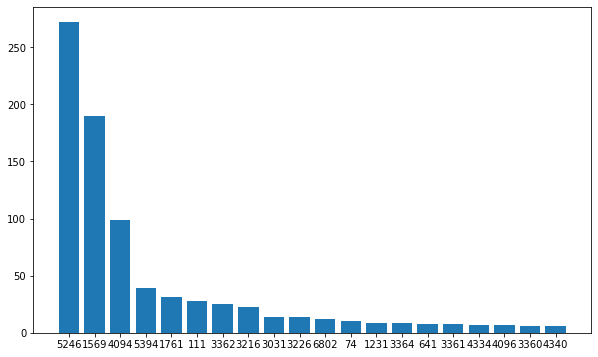

In [107]:
plt.rcParams["figure.figsize"] = (10,6)

plt.bar(x = spns_before_derate.head(20)['index'].astype(str), height=spns_before_derate.head(20)['spn']);

Look for average time between partial derate and full derate:

In [114]:
partial_d_index = np.array(time_series[time_series['spn'] == 1569].index)

In [127]:
time_series[time_series.index.isin(partial_d_index.tolist() + (partial_d_index + 1).tolist())][time_series['spn'] == 5246].time_diff.mean()

<ipython-input-127-60f89605e62b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  time_series[time_series.index.isin(partial_d_index.tolist() + (partial_d_index + 1).tolist())][time_series['spn'] == 5246].time_diff.mean()


Timedelta('0 days 08:27:15.152631578')

There are, on average, 8 hours until a full derate from a partial derate